### Reimann Integral

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def I_reimannRight(func,a,b,n):
    x = np.linspace(a,b,n)
    f = func(x)
    h = (b-a)/(n-1)
    return(h*sum(f[1:n]))
def I_reimannLeft(func,a,b,n):
    x = np.linspace(a,b,n)
    f = func(x)
    h = (b-a)/(n-1)
    return(h*sum(f[:n-1]))

In [3]:
def I_midpoint(func,a,b,n):
    x = np.linspace(a,b,n)
    f = func(x)
    h = (b-a)/(n-1)
    return(h*sum(f[1:n-1]))

In [4]:
def I_trap(func,a,b,n):
    x = np.linspace(a,b,n)
    f = func(x)
    h = (b-a)/(n-1)
    return((h/2) * (f[0]+ 2*sum(f[1:n-1])+f[n-1]))

In [5]:
def I_simp(func,a,b,n):
    x = np.linspace(a,b,n+1)
    f = func(x)
    h = (b-a)/n
    result = 0
    i = 2
    while i <= n:
        result += (h/3)*(f[i-2]+4*f[i-1]+f[i])
        i += 2
    return(result)

In [6]:
func = lambda x : np.sin(x)

In [7]:
I_midpoint(func,0,np.pi,11)

1.9835235375094546

In [8]:
I_simp(func,0,np.pi,11)

1.9595661098892299

In [9]:
def gauss_legendre(f, a, b, N):
    nodes, weights = np.polynomial.legendre.leggauss(N)

    # Transform nodes to the interval [a, b]
    transformed_nodes = (b - a) / 2 * nodes + (a + b) / 2
    
    transformed_weights = (b - a) / 2 * weights
    
    # Calculate the integral value directly
    integral_value = sum(transformed_weights * func(transformed_nodes))
    
    return integral_value

We use the left, right and midpoint rule of Reimann integral to approximate the function $I = \int_{0}^{\pi} sin(x) dx$ with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2

In [10]:
# Riemann Integral

In [11]:
a=0
b=np.pi
n=11
h=(b-a)/(n-1)

x=np.linspace(a,b,n)
f=np.sin(x)

In [12]:

I_reimannL = h * sum(f[:n-1])
err_riemannL = 2 - I_reimannL # 2 here is the known exact value

In [13]:
print(I_reimannL, err_riemannL)

1.9835235375094546 0.01647646249054535


In [14]:
I_reimannR = h *sum(f[1:n])
err_riemannR = 2 - I_reimannR

In [15]:
print(I_reimannR, err_riemannR)

1.9835235375094546 0.01647646249054535


In [16]:
# Midpoint rule

In [17]:
I_mid=h*sum(np.sin((x[:n-1]+x[1:n])/2)) # Don't include first or last value
err_Imid= 2 - I_mid

In [18]:
print(I_mid, err_Imid) # Error much smaller prop to h^3

2.0082484079079745 -0.008248407907974542


### Trapezoid rule

In [19]:
# Trapozoid Rule

In [20]:
I_trap= (h/2)*(f[0]+ 2*sum(f[1:n-1]) + f[n-1])
#.    first value.   all middle values appear twise.  last value. 
err_Itrap=2-I_trap

In [21]:
print(I_trap,err_Itrap)

1.9835235375094546 0.01647646249054535


In [22]:
# Using scipy package:

Computing integrals with python. The $scipy.integrate$ subpackage has several functions for computing integrals. The $trapezoid$ takes as arguments an array of function values $f$ computed on a numerical grid $x$

In [23]:
from scipy.integrate import trapezoid as trpz


In [24]:
I_trapz=trpz(f,x)
err=2-I_trapz

In [25]:
print(I_trapz,err)

1.9835235375094542 0.016476462490545796


### The Simpson's rule

In [26]:
from scipy.integrate import simpson
# Simpson Rule

In [27]:
I_simp=simpson(f, x=x)
I_simp
err=2-I_simp
print(I_simp, err)

2.0001095173150043 -0.00010951731500430384


In [28]:
# Guassian quadrature scipy package

In [29]:
from scipy.integrate import quad 

I_quad, est_err_quad = quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0


Lets' assume we want to calculate the $ \int_0^\pi sin(x) dx$ using Gaussian-Legendre quadrature. 

First, transform the integral using the substitution method. Given an integral from (a) to (b), we need to transform it to the standard interval from (-1) to (1) using the change of variables:
$ x = \frac{b-a}{2}t + \frac{a+b}{2} $

The differential is then:
$ dx = \frac{b-a}{2} dt $

Using these transformations, the integral becomes:
$ \int_{a}^{b} f(x) dx = \frac{b-a}{2} \int_{-1}^{1} f\left(\frac{b-a}{2}t + \frac{a+b}{2}\right)  dt $




In [30]:
# Guass Legendre Method Analytically

In [31]:
import numpy as np

def gauss_legendre(f, a, b):
    # Transformation constants
    c1 = (b - a) / 2
    c2 = (a + b) / 2

    # Gauss-Legendre three-point nodes and weights
    nodes = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
    weights = np.array([5/9, 8/9, 5/9])

    # Transform and evaluate the integral
    I = c1 * sum(weights * f((c1 * nodes) + c2))
    print(c1,c2)
    return I

a = 0  # Lower limit
b = np.pi  # Upper limit
  # Calculate the integral of sin(x) from a to b
integral_value = gauss_legendre(np.sin, a, b)
print(f"The integral of sin(x) from {a} to {b} is approximately {integral_value}")

1.5707963267948966 1.5707963267948966
The integral of sin(x) from 0 to 3.141592653589793 is approximately 2.0013889136077436


#### 1. c1 * nodes + c2: This expression transforms the nodes from the interval ([-1, 1]) to the interval ([a, b]) using the transformation defined earlier.

#### 2. func(c1 * nodes + c2): This evaluates the input function at the transformed nodes. If you were integrating sin(x), this would compute (\sin) at the transformed node locations.

#### 3. weights * func(...): This computes the weighted contributions of the function evaluations. sum(...): This sums up all the weighted contributions to get the final evaluation of the integral.

#### 4. c1 * ...: Finally, multiplying by c1 incorporates the scale factor for the length of the interval ([a, b]), completing the transformation needed for the definite integral.


In [32]:


a=-1
b=1
my_est=gauss_legendre(np.exp,a,b)
print(f"The integral of e^x from {a} to {b} is {my_est}")


1.0 0.0
The integral of e^x from -1 to 1 is 2.3503369286800115


In [33]:
import numpy as np
from scipy.integrate import trapezoid

def gauss_legendre(f, a, b):
    # Gauss-Legendre three-point nodes and weights for the interval [-1, 1]
    nodes = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
    weights = np.array([5/9, 8/9, 5/9])

    # Transform nodes to the interval [a, b]
    transformed_nodes = (b - a) / 2 * nodes + (a + b) / 2
    
    # Calculate the integral value directly
    integral_value = (b - a) / 2 * sum(weights * func(transformed_nodes))
    return integral_value

def my_function(x):
    # Define a 6th degree polynomial function
    return 2*x**5  + 5*x**2 + 4*x**3 + 3*x**4 + 6*x + 7 + x**6 

# Integration bounds
a = -2
b = 3

# Calculate the integral using Gauss-Legendre
my_est = gauss_legendre(my_function, a, b)
print(f"The integral of f(x) from {a} to {b} using Gauss-Legendre is approximately {my_est}")

# Number of sample points for trapezoidal rule
n = 1000  # Adjust as needed for accuracy

# Create an array of x values
x_values = np.linspace(a, b, n)
# Calculate the corresponding y values for the function
y_values = my_function(x_values)

# Calculate the integral using the trapezoidal rule
integral_value_trapz = trapezoid(y_values, x_values)

print(f"The integral of f(x) from {a} to {b} using the trapezoidal rule is approximately {integral_value_trapz}")

The integral of f(x) from -2 to 3 using Gauss-Legendre is approximately 0.5891623852548912
The integral of f(x) from -2 to 3 using the trapezoidal rule is approximately 890.7201933524996


## Monte Carlo Integration 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.sin(x)


N= 100000
a,b = 0,np.pi
x=np.random.uniform(a,b,N)

s=0
for i in range(N):
    value=func(x[i])
    s=s+value

integral=(s/N)*(b-a)
print(integral)

1.9959609265844047


In [35]:
b

3.141592653589793

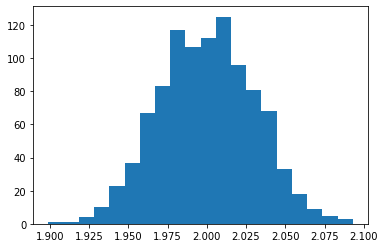

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return np.sin(x)

N=1000
M=1000
a,b=0,np.pi
integrals=[]

for k in range(M):
    x=np.random.uniform(a,b,N)
    s=0
    for i in range(N):
        value=func(x[i])
        s=s+value
    integral=(s/N)*(b-a)
    integrals.append(integral)

plt.hist(integrals,bins=20)
plt.show()
    

In [37]:
import numpy as np
a,b=0,np.pi
n=11
h=(b-a)/(n-1)
x=np.linspace(a,b,n)

f=np.sin(x)

integral_trapezoid=(h/2)*(f[0]+2*sum(f[1:n-1]) + f[n-1])
error_ip=2-integral_trapezoid
print(f"The Integral of the function using the Trapezoid reule is: {integral_trapezoid}")
print(f"with an error of {error_ip}")

The Integral of the function using the Trapezoid reule is: 1.9835235375094546
with an error of 0.01647646249054535


In [38]:
import numpy as np
from scipy.integrate import quad, simpson, trapezoid
from scipy.special import roots_legendre

# Define the function to integrate
def func(y):
    return np.exp(-y**2)

# Integration limits
a, b = 0, 1

# 1. Calculate the integral using the quadrature method
quad_result, quad_err = quad(func, a, b)
quad_result = quad_result * 2 / np.sqrt(np.pi)  # Adjusting for the final result

print("Result from quad (Gaussian quadrature):", quad_result)
print("Estimated error:", quad_err)

# 2. Calculate the integral using the trapezoidal method
n_points = 101  # You can adjust this for better accuracy
x_values = np.linspace(a, b, n_points)  # X values for trapezoidal method
y_values = func(x_values)  # Function values at those x values
trapezoidal_result = trapezoid(y_values, x_values)

print("Result from trapezoidal method:", trapezoidal_result)

# 3. Calculate the integral using Simpson's 1/3 rule (with 3 points)
x_values_simpson = np.linspace(a, b, 3)  # [0, 0.5, 1]
y_values_simpson = func(x_values_simpson)
simpson_result = (b - a) / 6 * (y_values_simpson[0] + 4 * y_values_simpson[1] + y_values_simpson[2])

print("Result using 3-point Simpson's rule:", simpson_result)



Result from quad (Gaussian quadrature): 0.842700792949715
Estimated error: 8.291413475940725e-15
Result from trapezoidal method: 0.7468180014679698
Result using 3-point Simpson's rule: 0.7471804289095104


Set ( $x = \frac{b-a}{2} \cdot t + \frac{b+a}{2} ).$
L'integrale si trasforma:
Integrale originale: $(\int_a^b f(x) , dx)$
Integrale scalato: $(\frac{b-a}{2} \int_{-1}^{1} f\left(\frac{b-a}{2} t + \frac{b+a}{2}\right) , dt).$